**HOMEWORK 2: Least Action using Minimization**\
*Camila Posada Soto*

In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import minimize
global g  
g=9.8 #m/s^2

Populating the interactive namespace from numpy and matplotlib


*Functions given in class:*

In [3]:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

In [4]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt

*Parameters:*

In [5]:
t=3.0
m=0.2 
n=21

*Fmin powell method:*

In [36]:
#Minimization from class: fmin_powell
y = xfit(n)
print(y)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837
(array([ 0.        ,  2.09485981,  3.96927762,  5.62312695,  7.05635241,
        8.26906363,  9.26154883, 10.03312026, 10.58423427, 10.91506033,
       11.02529045, 10.91501183, 10.58427987, 10.03303519,  9.26102159,
        8.26869546,  7.05596305,  5.62273064,  3.9689361 ,  2.09464162,
        0.        ]), 11.025290448185725, -21.55497732876534, 0.15)


*optimize.minimize method:*

In [15]:
#Now using scipy.optimize.minimize
x0=np.zeros(n)
obj= optimize.minimize(S,x0, args=(t,m), method='SLSQP', tol=1E-8)

In [18]:
print('attributes:',dir(obj))

attributes: ['fun', 'jac', 'message', 'nfev', 'nit', 'njev', 'status', 'success', 'x']


In [19]:
print('function value:', obj.fun)

function value: -21.55497749985049


In [44]:
otherx=obj.x
otherx

array([ 0.        ,  2.09474845,  3.96900267,  5.62274641,  7.05600199,
        8.26874822,  9.26100029, 10.03274946, 10.58400069, 10.91474985,
       11.02499964, 10.91475023, 10.58399946, 10.03275036,  9.26099903,
        8.26875039,  7.05599649,  5.62275274,  3.96899728,  2.09475172,
        0.        ])

In [28]:
print('iterations:',obj.nit)

iterations: 15


In [22]:
print(obj.message)

Optimization terminated successfully.


*Graph comparisson:*

In [40]:
#Graph
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[3]
tx=np.linspace(0,t,n)

array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
       1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ])

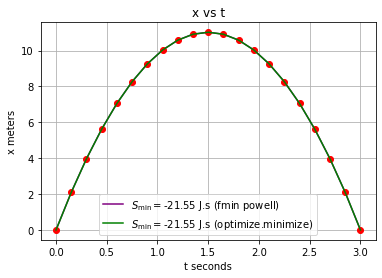

In [52]:
plt.plot(tx,x,color='purple',label='$S_{\mathrm{min}}=$%.2f J.s (fmin powell)' %Smin)
plt.plot(tx,x,'ro')
plt.plot(tx, otherx, color='green', label='$S_{\mathrm{min}}=$%.2f J.s (optimize.minimize)' %Smin)
plt.ylabel('x meters')
plt.xlabel('t seconds')
plt.title('x vs t')
plt.legend(loc='best')
plt.grid()

**Conclusions**
Finally, the two methods for least action are practically the same, because by seeing at the graph we notice that both of them are the same line.